In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# from IPython.core.display import display, HTML, clear_output
# display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
import pandas as pd
import numpy as np
from scipy import optimize
from scipy.stats import sem

import os
import sys

import matplotlib.pyplot as plt
import matplotlib.ticker
from venn import venn, pseudovenn
import seaborn as sns
from matplotlib.collections import PathCollection

from Bio import SeqIO, SeqUtils
from Bio.SeqUtils.ProtParam import ProteinAnalysis

from addict import Dict
import json

import matplotlib.ticker as mticker
import matplotlib.cm as cm
from matplotlib.patches import Rectangle, Patch

In [5]:
sys.path.append("../")
import plotting as my_plot

sys.path.append("./mean_field_elect/")
import proteomics_functions as prot_fun

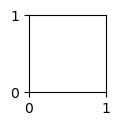

In [6]:
fig, ax = my_plot.instantiate_fig(1, 1)

# Load data

In [7]:
df_sec = pd.read_csv('./generated_tables/prev_swath_master_df_ppm.csv')
df_swath = pd.read_csv('./generated_tables/swath_master_df_ppm.csv')

df_all = df_sec.merge(df_swath, how='outer')

df_plot = df_all.drop(columns=['accn', 'name'])
df_plot = df_plot.fillna(0)
df_plot = np.log10(df_plot)
df_plot.replace(-1*np.inf, np.nan, inplace=True)

/home/chase/psi4conda/envs/jupyter/lib/python3.11/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)


In [8]:
resins = ['cq', 'xq', 'hq']
fracs = ['a5', 'b12', 'd9', 'g12', 'eluate']

resin_names = {'cq':'Capto Q', 'xq':'Poros XQ', 'hq':'Poros 50 HQ'}
frac_names = {'a5':'A5', 'b12':'B12', 'd9':'D9', 'g12':'G12', 'eluate':'Adsorbate'}
percent_loading = {'a5':'5%', 'b12':'28%', 'd9':'53%', 'g12':'99%', 'eluate':'Adsorbate'}

# Plots

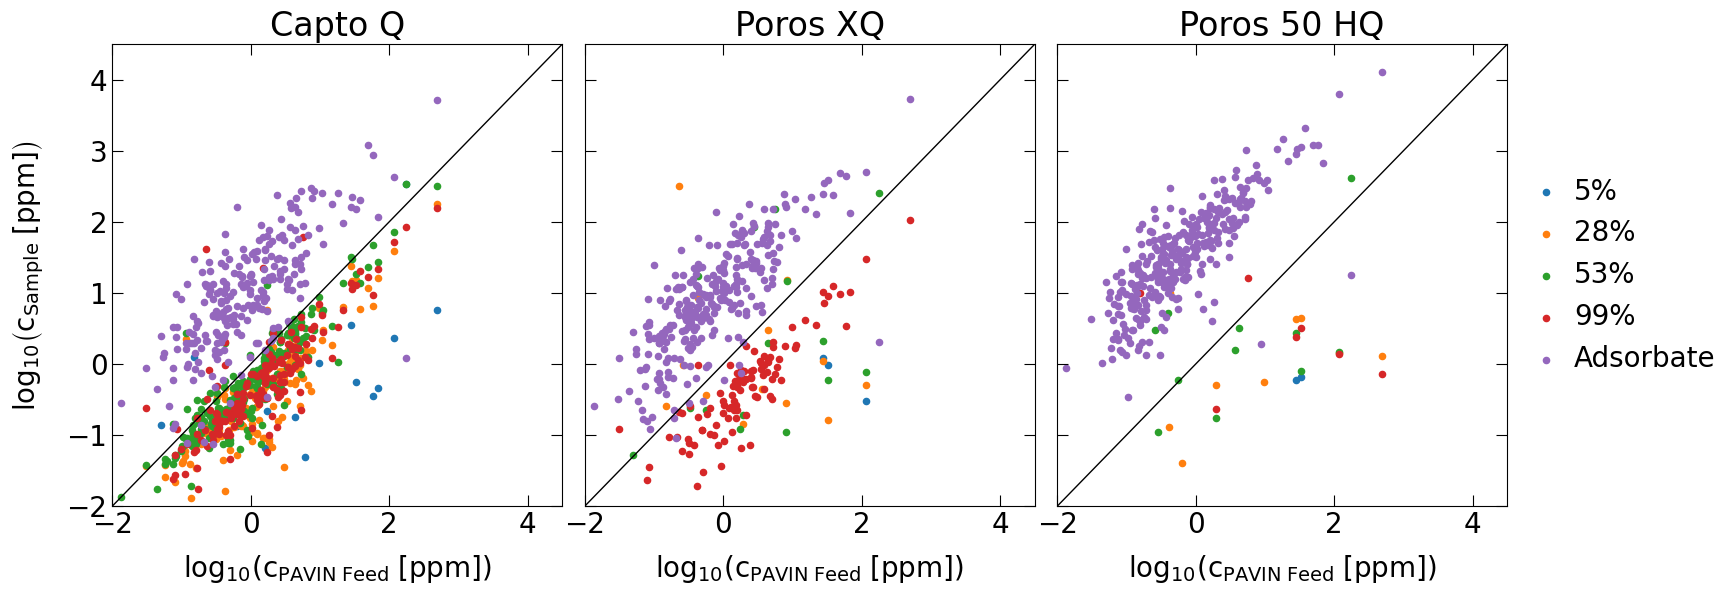

In [9]:
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True)
fig.set_size_inches(18, 6, forward=True)

lim_vals = [-2, 4.5]
ax[0].set_ylabel(r'$\mathsf{log_{10}\left( c_{Sample} \; [ppm] \right)}$', labelpad=15)
for i, resin in enumerate(resins):
    ax[i].set_xlabel(r'$\mathsf{log_{10}\left( c_{PAVIN \; Feed} \; [ppm] \right)}$', labelpad=10)
    ax[i].set_title(resin_names[resin])
    ax[i].tick_params(axis='both', direction='in', length=8, bottom=True, top=True, left=True, right=True)
    ax[i].set_ylim(lim_vals)
    ax[i].set_xlim(lim_vals)
    ax[i].plot(lim_vals, lim_vals, color='black', linewidth=1)

for i, resin in enumerate(resins):
    for frac in fracs:
        sample = f'{resin}_{frac}'
        ax[i].scatter(df_plot['pavin_feed'], df_plot[sample], label=percent_loading[frac], s=20)
        
legend = ax[2].legend(loc='center left', bbox_to_anchor=(1.0, 0.5), frameon=False, handletextpad=0.5, handlelength=1)
plt.subplots_adjust(wspace=0.05)
# plt.savefig('./images/9_c_sample_vs_c_feed.png', dpi=300, bbox_inches='tight')

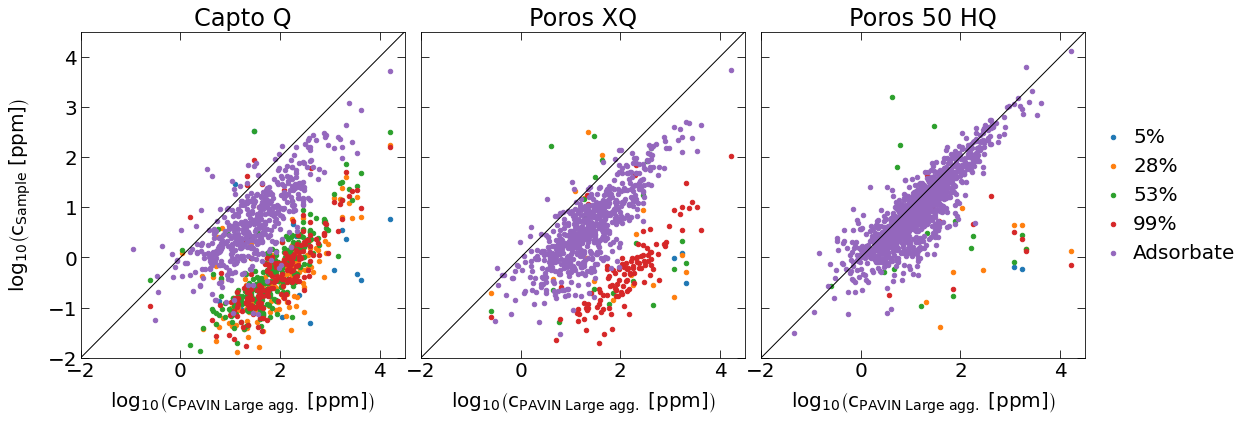

In [44]:
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True)
fig.set_size_inches(18, 6, forward=True)

lim_vals = [-2, 4.5]
ax[0].set_ylabel(r'$\mathsf{log_{10}\left( c_{Sample} \; [ppm] \right)}$', labelpad=15)
for i, resin in enumerate(resins):
    ax[i].set_xlabel(r'$\mathsf{log_{10}\left( c_{PAVIN \; Large \; agg.} \; [ppm] \right)}$', labelpad=10)
    ax[i].set_title(resin_names[resin])
    ax[i].tick_params(axis='both', direction='in', length=8, bottom=True, top=True, left=True, right=True)
    ax[i].set_ylim(lim_vals)
    ax[i].set_xlim(lim_vals)
    ax[i].plot(lim_vals, lim_vals, color='black', linewidth=1)

for i, resin in enumerate(resins):
    for frac in fracs:
        sample = f'{resin}_{frac}'
        ax[i].scatter(df_plot['pavin_large'], df_plot[sample], label=percent_loading[frac], s=20)
        
legend = ax[2].legend(loc='center left', bbox_to_anchor=(1.0, 0.5), frameon=False, handletextpad=0.5, handlelength=1)
plt.subplots_adjust(wspace=0.05)
plt.savefig('./images/9_c_sample_vs_c_large_agg.png', dpi=300, bbox_inches='tight')

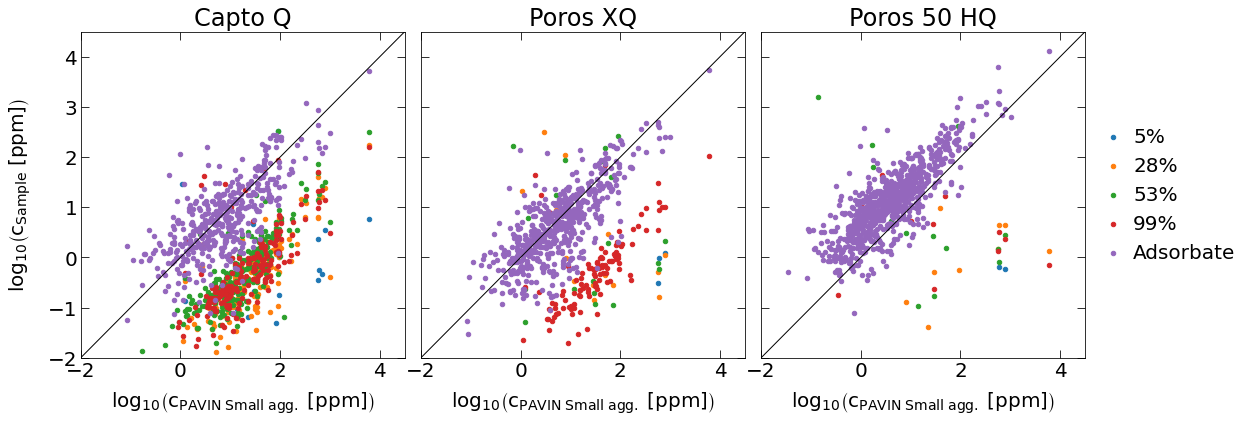

In [45]:
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True)
fig.set_size_inches(18, 6, forward=True)

lim_vals = [-2, 4.5]
ax[0].set_ylabel(r'$\mathsf{log_{10}\left( c_{Sample} \; [ppm] \right)}$', labelpad=15)
for i, resin in enumerate(resins):
    ax[i].set_xlabel(r'$\mathsf{log_{10}\left( c_{PAVIN \; Small \; agg.} \; [ppm] \right)}$', labelpad=10)
    ax[i].set_title(resin_names[resin])
    ax[i].tick_params(axis='both', direction='in', length=8, bottom=True, top=True, left=True, right=True)
    ax[i].set_ylim(lim_vals)
    ax[i].set_xlim(lim_vals)
    ax[i].plot(lim_vals, lim_vals, color='black', linewidth=1)

for i, resin in enumerate(resins):
    for frac in fracs:
        sample = f'{resin}_{frac}'
        ax[i].scatter(df_plot['pavin_small'], df_plot[sample], label=percent_loading[frac], s=20)
        
legend = ax[2].legend(loc='center left', bbox_to_anchor=(1.0, 0.5), frameon=False, handletextpad=0.5, handlelength=1)
plt.subplots_adjust(wspace=0.05)
plt.savefig('./images/9_c_sample_vs_c_small_agg.png', dpi=300, bbox_inches='tight')

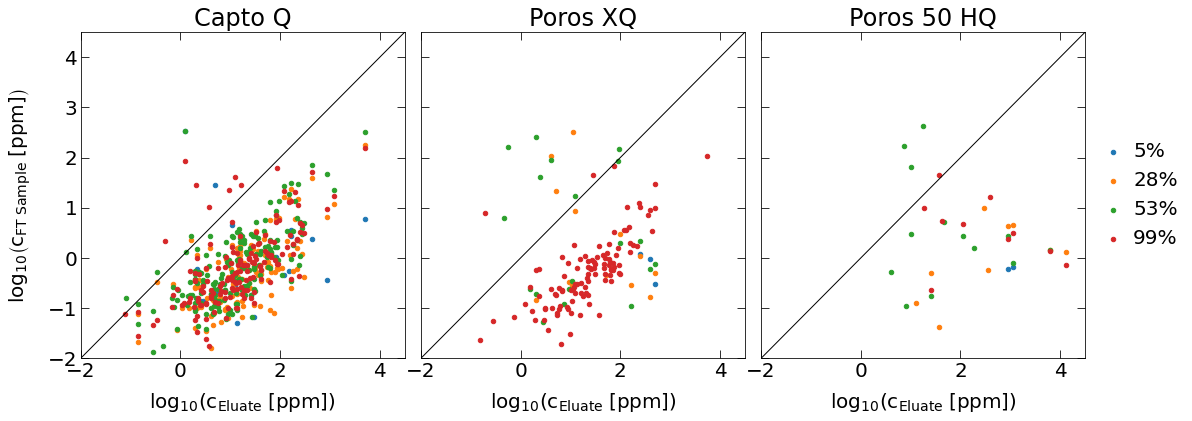

In [36]:
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True)
fig.set_size_inches(18, 6, forward=True)

lim_vals = [-2, 4.5]
ax[0].set_ylabel(r'$\mathsf{log_{10}\left( c_{FT \; Sample} \; [ppm] \right)}$', labelpad=15)
for i, resin in enumerate(resins):
    ax[i].set_xlabel(r'$\mathsf{log_{10}\left( c_{Eluate} \; [ppm] \right)}$', labelpad=10)
    ax[i].set_title(resin_names[resin])
    ax[i].tick_params(axis='both', direction='in', length=8, bottom=True, top=True, left=True, right=True)
    ax[i].set_ylim(lim_vals)
    ax[i].set_xlim(lim_vals)
    ax[i].plot(lim_vals, lim_vals, color='black', linewidth=1)

for i, resin in enumerate(resins):
    for frac in ['a5', 'b12', 'd9', 'g12']:
        sample = f'{resin}_{frac}'
        eluate_sample = f'{resin}_eluate'
        ax[i].scatter(df_plot[eluate_sample], df_plot[sample], label=percent_loading[frac], s=20)
        
legend = ax[2].legend(loc='center left', bbox_to_anchor=(1.0, 0.5), frameon=False, handletextpad=0.5, handlelength=1)
plt.subplots_adjust(wspace=0.05)
plt.savefig('./images/9_c_ft_vs_c_eluate.png', dpi=300, bbox_inches='tight')

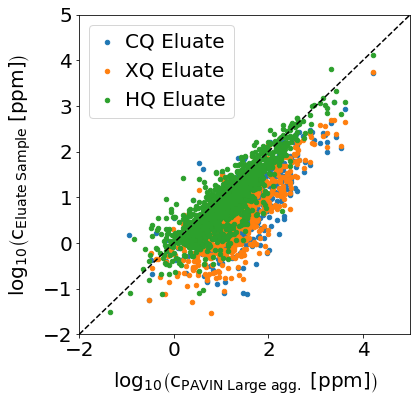

In [37]:
fig, ax = my_plot.instantiate_fig(xlabel=r'$\mathsf{log_{10}\left( c_{PAVIN \; Large \; agg.} \; [ppm] \right)}$', 
                                  ylabel=r'$\mathsf{log_{10}\left( c_{Eluate \; Sample} \; [ppm] \right)}$', x=6.2, y=6)

ax.scatter(df_plot.pavin_large, df_plot.cq_eluate, label='CQ Eluate', s=20)
ax.scatter(df_plot.pavin_large, df_plot.xq_eluate, label='XQ Eluate', s=20)
ax.scatter(df_plot.pavin_large, df_plot.hq_eluate, label='HQ Eluate', s=20)

vals = [-2, 5]
ax.set_xlim(vals)
ax.set_ylim(vals)
ax.plot(vals, vals, 'k--')

my_plot.set_layout(fig, ax, legend=True, frameon=True, loc='upper left', handletextpad=0.4)
# plt.savefig('./images/9_c_eluate_vs_c_large_agg.png', dpi=300)